In [1]:
pip install tueplots

In [12]:
from tueplots import bundles, axes

plt.rcParams.update({"figure.dpi": 150})

In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from utils.data_generator import DataGenerator
from utils.myutils import Utils
import matplotlib.pyplot as plt
import random
import json
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr

utils = Utils()
import time

2023-12-05 18:33:13.167938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 18:33:13.256696: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [23]:
df = pd.read_json(
    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_normal.json"
)
df.head(5)

,IForest,KNN,CBLOF,PCA,ECOD,GPLVM
0,0.484474,0.561626,0.521145,0.530937,0.512910,0.511157
1,0.918109,0.813666,0.698372,0.828212,0.848831,0.701537
2,0.737948,0.917109,0.797662,0.773148,0.842541,0.757394
3,0.987799,0.991127,0.988474,0.987895,0.987027,0.991561
4,0.702520,0.749506,0.726664,0.758704,0.761068,0.743333


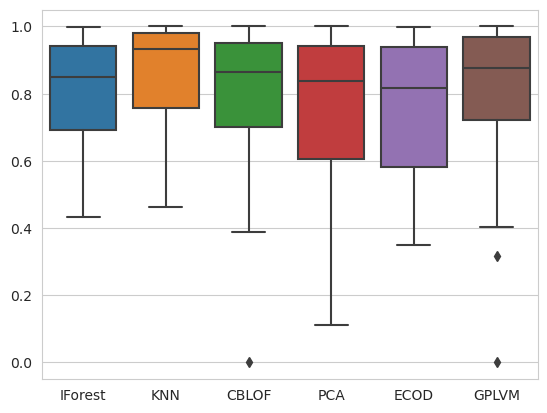

In [34]:
sns.set_style("whitegrid")
sns.boxplot(data=df)
s.set_title("002_adbench_vs_gplvm_aucroc_normal")
plt.savefig(
    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_normal.jpg"
)

In [75]:
base = "experiments/complete/adbench/duplicate_anomalies/"


def save_experiment_boxplot(base_path):
    for path in os.listdir(base_path):
        if path.endswith("json"):
            plt.figure()
            df = pd.read_json(base + path)
            s = sns.boxplot(data=df)
            img = path.replace(".json", ".png")
            title = path.replace(".json", "")
            s.set_title(title)
            plt.savefig(base + "images/" + img)


# save_experiment_boxplot(base)

In [197]:
base = "experiments/complete/adbench/duplicate_anomalies/"
list_dict = []
dict_exp = {}
df_result = pd.DataFrame(data=None)
for path in os.listdir(base):
    if path.endswith("json"):
        with open(base + path, "r") as file:
            exp = json.load(file)
            exp = pd.DataFrame(exp).mean(axis=0).to_dict()
            dict_exp = {path.replace("ad_vs_gp_", "").replace(".json", ""): exp}
            df = pd.DataFrame(dict_exp).T
            df_result = pd.concat([df_result, df])

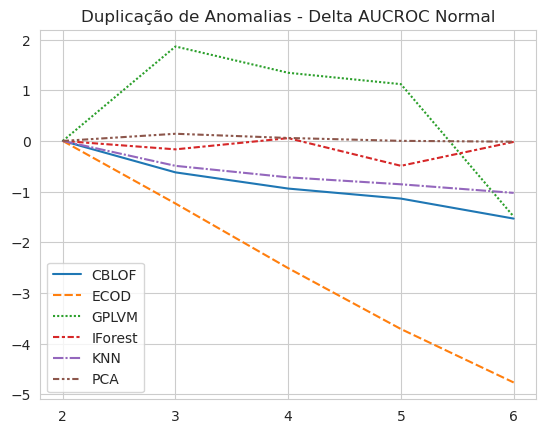

In [205]:
df_normal_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_normal_2",
            "aucroc_normal_3",
            "aucroc_normal_4",
            "aucroc_normal_5",
            "aucroc_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_normal_2": "2",
        "aucroc_normal_3": "3",
        "aucroc_normal_4": "4",
        "aucroc_normal_5": "5",
        "aucroc_normal_6": "6",
    }
)
df_normal_aucroc_delta = df_normal_aucroc.subtract(df_normal_aucroc.iloc[0,:])*100
s = sns.lineplot(df_normal_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Normal")
None

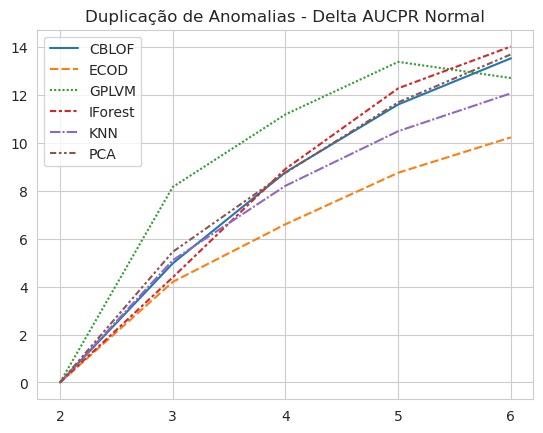

In [204]:
df_normal_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_normal_2",
            "aucpr_normal_3",
            "aucpr_normal_4",
            "aucpr_normal_5",
            "aucpr_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_normal_2": "2",
        "aucpr_normal_3": "3",
        "aucpr_normal_4": "4",
        "aucpr_normal_5": "5",
        "aucpr_normal_6": "6",
    }
)
df_normal_aucpr_delta = df_normal_aucpr.subtract(df_normal_aucpr.iloc[0,:])*100
s = sns.lineplot(df_normal_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Normal")
None

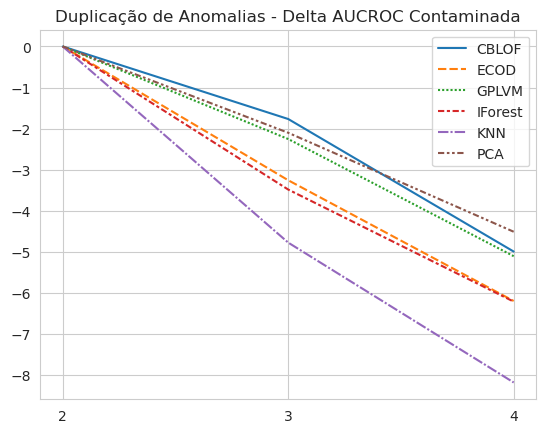

In [206]:
df_contaminated_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_contaminated_2",
            "aucroc_contaminated_3",
            "aucroc_contaminated_4",
            "aucroc_contaminated_5",
            "aucroc_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_contaminated_2": "2",
        "aucroc_contaminated_3": "3",
        "aucroc_contaminated_4": "4",
        "aucroc_contaminated_5": "5",
        "aucroc_contaminated_6": "6",
    }
)
df_contaminated_aucroc_delta = df_contaminated_aucroc.subtract(df_contaminated_aucroc.iloc[0,:])*100
s = sns.lineplot(df_contaminated_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Contaminada")
None

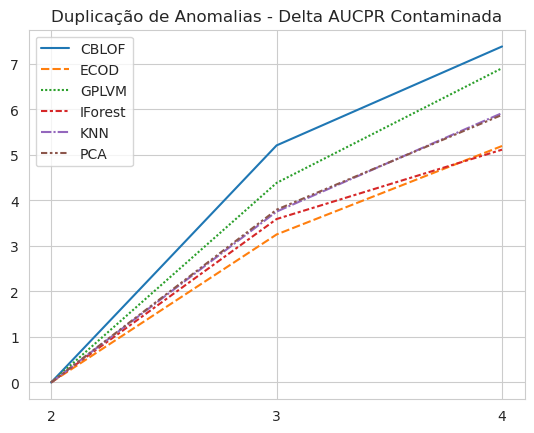

In [207]:
df_contaminated_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_contaminated_2",
            "aucpr_contaminated_3",
            "aucpr_contaminated_4",
            "aucpr_contaminated_5",
            "aucpr_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_contaminated_2": "2",
        "aucpr_contaminated_3": "3",
        "aucpr_contaminated_4": "4",
        "aucpr_contaminated_5": "5",
        "aucpr_contaminated_6": "6",
    }
)
df_contaminated_aucpr_delta = df_contaminated_aucpr.subtract(df_contaminated_aucpr.iloc[0,:])*100
s = sns.lineplot(df_contaminated_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Contaminada")
None